<a href="https://colab.research.google.com/github/KeremKuru22/MyProjects/blob/main/Applied_Informatics_The_Effects_of_Sleep%2C_Stress%2C_and_Lifestyle_on_Heart_Disease_Evidence_from_BRFSS_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    RocCurveDisplay
)

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

df = pd.read_csv("heart_2020_cleaned.csv")

Saving heart_2020_cleaned.csv to heart_2020_cleaned.csv


In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [ ]:
df.shape

(319795, 18)

In [ ]:
df["HeartDisease"] = df["HeartDisease"].map({"Yes": 1, "No": 0})
df["HeartDisease"].value_counts()

,count
HeartDisease,
0,292422
1,27373


In [ ]:
sleep_features = ["SleepTime"]

stress_features = ["MentalHealth", "PhysicalHealth"]

lifestyle_features = [
    "Smoking",
    "AlcoholDrinking",
    "PhysicalActivity",
    "BMI",
    "GenHealth"
]

demographic_features = [
    "Sex",
    "AgeCategory",
    "Race"
]

medical_history_features = [
    "Stroke",
    "DiffWalking",
    "Diabetic",
    "Asthma",
    "KidneyDisease",
    "SkinCancer"
]

In [ ]:
target_col = "HeartDisease"

In [ ]:
base_features = sleep_features + stress_features + lifestyle_features + demographic_features

In [ ]:
print("Base features:", base_features)

Base features: ['SleepTime', 'MentalHealth', 'PhysicalHealth', 'Smoking', 'AlcoholDrinking', 'PhysicalActivity', 'BMI', 'GenHealth', 'Sex', 'AgeCategory', 'Race']


In [ ]:
data = df[base_features + [target_col]].copy()
print("Before dropna:", data.shape)

Before dropna: (319795, 12)


In [ ]:
missing = data.isna().sum().sort_values(ascending=False)
print("Missing values:\n", missing)

Missing values:
 SleepTime           0
MentalHealth        0
PhysicalHealth      0
Smoking             0
AlcoholDrinking     0
PhysicalActivity    0
BMI                 0
GenHealth           0
Sex                 0
AgeCategory         0
Race                0
HeartDisease        0
dtype: int64


In [ ]:
data_clean = data.dropna()
print("After dropna:", data_clean.shape)

After dropna: (319795, 12)


In [ ]:
X = data_clean[base_features]
y = data_clean[target_col]

In [ ]:
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
num_cols = [c for c in X.columns if c not in cat_cols]

In [ ]:
print("Categorical:", cat_cols)
print("Numeric:", num_cols)

Categorical: ['Smoking', 'AlcoholDrinking', 'PhysicalActivity', 'GenHealth', 'Sex', 'AgeCategory', 'Race']
Numeric: ['SleepTime', 'MentalHealth', 'PhysicalHealth', 'BMI']


In [ ]:
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)
print("Encoded shape:", X_encoded.shape)
X_encoded.head()

Encoded shape: (319795, 29)


,SleepTime,MentalHealth,PhysicalHealth,BMI,Smoking_Yes,AlcoholDrinking_Yes,PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,...,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,5,30,3,16.60,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,7,0,0,20.34,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,8,30,20,26.58,True,False,True,True,False,False,...,False,True,False,False,False,False,False,False,False,True
3,6,0,0,24.21,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
4,8,0,28,23.71,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (255836, 29) Test: (63959, 29)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
log_reg = LogisticRegression(
    max_iter=1000,)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

print("LogReg Accuracy:", accuracy_score(y_test, y_pred))
print("LogReg ROC-AUC:", roc_auc_score(y_test, y_proba))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

LogReg Accuracy: 0.914304476305133
LogReg ROC-AUC: 0.82415287450121

Confusion matrix:
 [[58184   300]
 [ 5181   294]]

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     58484
           1       0.49      0.05      0.10      5475

    accuracy                           0.91     63959
   macro avg       0.71      0.52      0.53     63959
weighted avg       0.88      0.91      0.88     63959



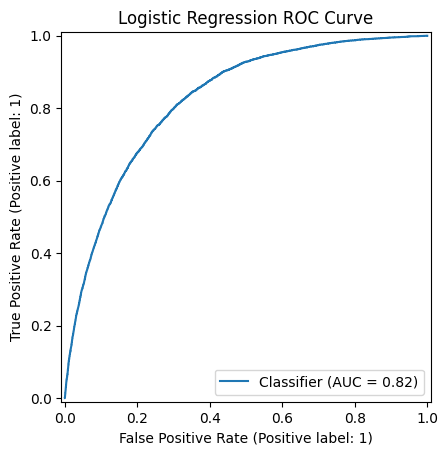

In [ ]:
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("Logistic Regression ROC Curve")
plt.savefig("roc_logreg_unbalanced.png")
plt.show()


In [ ]:
feature_names = X_encoded.columns

In [ ]:
coefs = pd.DataFrame({
    "feature": feature_names,
    "coef": log_reg.coef_[0]
})

coefs["abs_coef"] = coefs["coef"].abs()

coefs_sorted = coefs.sort_values(by="abs_coef", ascending=False).head(20)
coefs_sorted

,feature,coef,abs_coef
23,AgeCategory_80 or older,0.904031,0.904031
21,AgeCategory_70-74,0.870730,0.870730
20,AgeCategory_65-69,0.806684,0.806684
22,AgeCategory_75-79,0.797335,0.797335
19,AgeCategory_60-64,0.717030,0.717030
18,AgeCategory_55-59,0.594579,0.594579
7,GenHealth_Fair,0.574901,0.574901
8,GenHealth_Good,0.553471,0.553471
17,AgeCategory_50-54,0.473725,0.473725
9,GenHealth_Poor,0.436071,0.436071


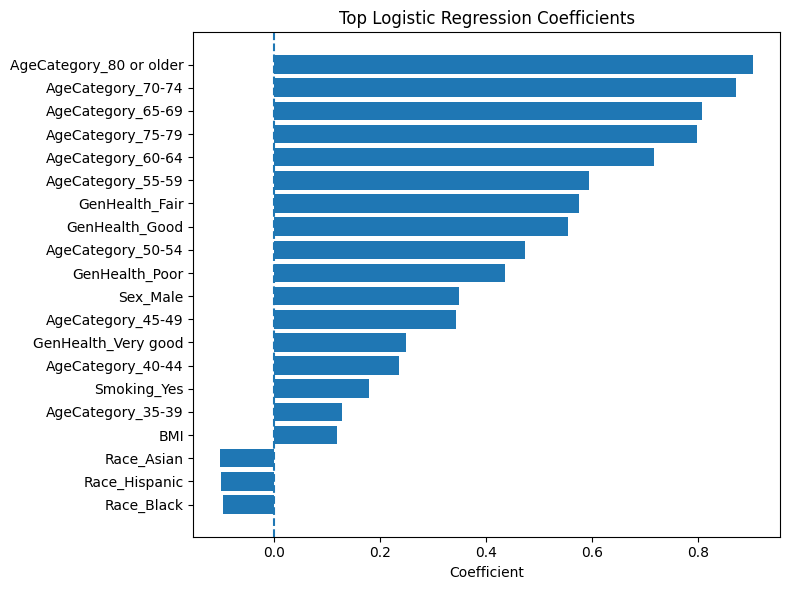

In [ ]:
plt.figure(figsize=(8, 6))
plt.barh(coefs_sorted["feature"], coefs_sorted["coef"])
plt.axvline(0, linestyle="--")
plt.gca().invert_yaxis()
plt.title("Top Logistic Regression Coefficients")
plt.xlabel("Coefficient")
plt.tight_layout()
plt.show()


In [ ]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1,)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("RF Accuracy:", accuracy_score(y_test, y_pred_rf))
print("RF ROC-AUC:", roc_auc_score(y_test, y_proba_rf))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification report:\n", classification_report(y_test, y_pred_rf))

RF Accuracy: 0.8972779436826717
RF ROC-AUC: 0.7548578278756489

Confusion matrix:
 [[56697  1787]
 [ 4783   692]]

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     58484
           1       0.28      0.13      0.17      5475

    accuracy                           0.90     63959
   macro avg       0.60      0.55      0.56     63959
weighted avg       0.87      0.90      0.88     63959



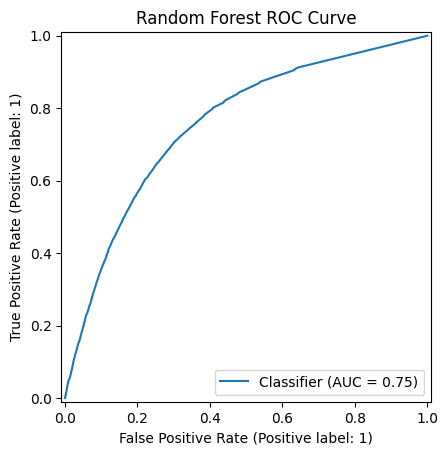

In [ ]:
RocCurveDisplay.from_predictions(y_test, y_proba_rf)
plt.title("Random Forest ROC Curve")
plt.savefig("roc_rf_unbalanced.png")
plt.show()



In [ ]:
importances = pd.DataFrame({
    "feature": X_encoded.columns,
    "importance": rf.feature_importances_
})

importances_sorted = importances.sort_values("importance", ascending=False).head(20)
importances_sorted


,feature,importance
3,BMI,0.475340
0,SleepTime,0.119768
2,PhysicalHealth,0.090413
1,MentalHealth,0.078158
9,GenHealth_Poor,0.022859
23,AgeCategory_80 or older,0.019878
7,GenHealth_Fair,0.019829
11,Sex_Male,0.019260
6,PhysicalActivity_Yes,0.018550
4,Smoking_Yes,0.015515


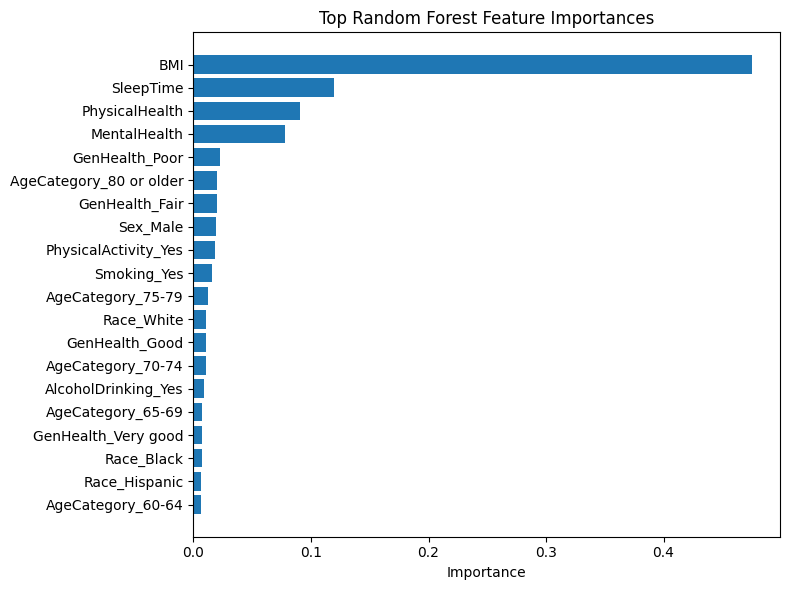

In [ ]:
plt.figure(figsize=(8, 6))
plt.barh(importances_sorted["feature"], importances_sorted["importance"])
plt.gca().invert_yaxis()
plt.title("Top Random Forest Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


In [ ]:
from xgboost import XGBClassifier


xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

print("XGB Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGB ROC-AUC:", roc_auc_score(y_test, y_proba_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))



XGB Accuracy: 0.9145390015478666
XGB ROC-AUC: 0.825161497551998
[[58320   164]
 [ 5302   173]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     58484
           1       0.51      0.03      0.06      5475

    accuracy                           0.91     63959
   macro avg       0.72      0.51      0.51     63959
weighted avg       0.88      0.91      0.88     63959



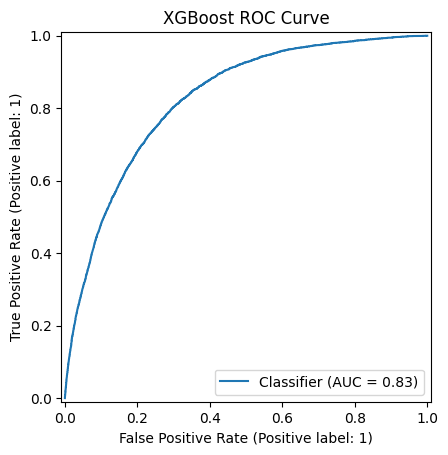

In [ ]:
RocCurveDisplay.from_predictions(y_test, y_proba_xgb)
plt.title("XGBoost ROC Curve")
plt.savefig("roc_xgb_unbalanced.png")
plt.show()


In [ ]:
importances_xgb = pd.DataFrame({
    "feature": X_encoded.columns,
    "importance": xgb.feature_importances_
})

importances_xgb_sorted = importances_xgb.sort_values(by="importance", ascending=False).head(20)
print(importances_xgb_sorted)


                    feature  importance
9            GenHealth_Poor    0.109791
23  AgeCategory_80 or older    0.106557
7            GenHealth_Fair    0.097566
22        AgeCategory_75-79    0.085027
21        AgeCategory_70-74    0.073639
12        AgeCategory_25-29    0.063627
13        AgeCategory_30-34    0.058086
14        AgeCategory_35-39    0.054716
8            GenHealth_Good    0.041720
20        AgeCategory_65-69    0.039188
11                 Sex_Male    0.038930
15        AgeCategory_40-44    0.037000
4               Smoking_Yes    0.034684
19        AgeCategory_60-64    0.027023
10      GenHealth_Very good    0.024338
2            PhysicalHealth    0.022871
16        AgeCategory_45-49    0.019797
28               Race_White    0.010330
5       AlcoholDrinking_Yes    0.007528
17        AgeCategory_50-54    0.006645


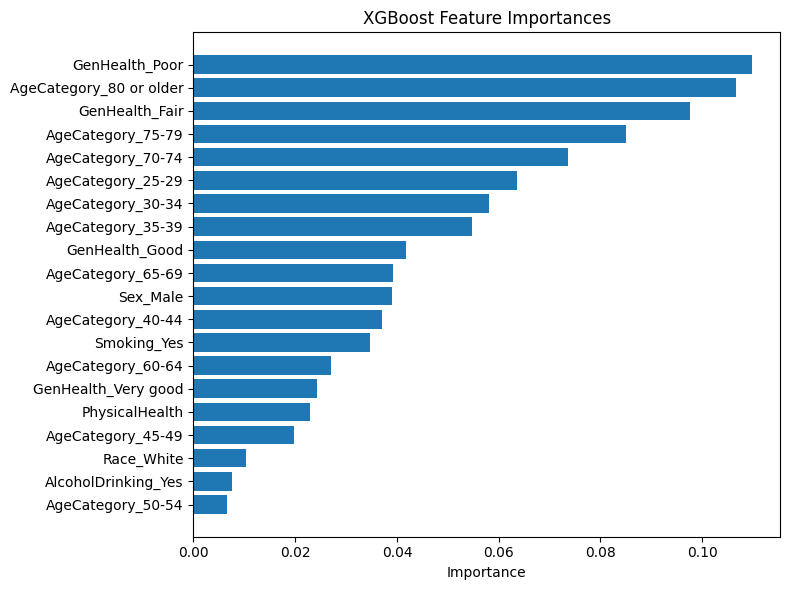

In [ ]:
plt.figure(figsize=(8,6))
plt.barh(importances_xgb_sorted["feature"], importances_xgb_sorted["importance"])
plt.gca().invert_yaxis()
plt.title("XGBoost Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


In [ ]:
log_reg_bal = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)
log_reg_bal.fit(X_train_scaled, y_train)

y_pred_lr_bal = log_reg_bal.predict(X_test_scaled)
y_proba_lr_bal = log_reg_bal.predict_proba(X_test_scaled)[:, 1]

print("LogReg Bal Accuracy:", accuracy_score(y_test, y_pred_lr_bal))
print("LogReg Bal ROC-AUC:", roc_auc_score(y_test, y_proba_lr_bal))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred_lr_bal))
print("\nClassification report:\n", classification_report(y_test, y_pred_lr_bal))


LogReg Bal Accuracy: 0.7278256382995356
LogReg Bal ROC-AUC: 0.8245384898621142

Confusion matrix:
 [[42297 16187]
 [ 1221  4254]]

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.72      0.83     58484
           1       0.21      0.78      0.33      5475

    accuracy                           0.73     63959
   macro avg       0.59      0.75      0.58     63959
weighted avg       0.91      0.73      0.79     63959



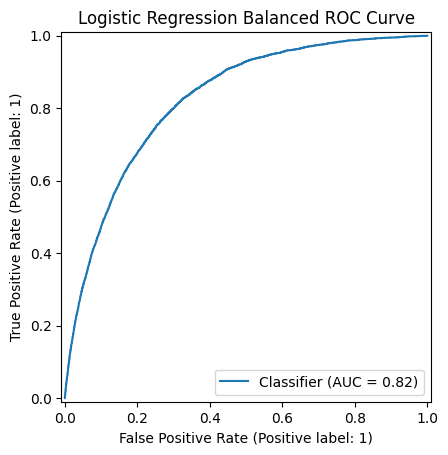

In [ ]:
RocCurveDisplay.from_predictions(y_test, y_proba_lr_bal)
plt.title("Logistic Regression Balanced ROC Curve")
plt.savefig("roc_logreg_balanced.png")
plt.show()


In [ ]:
rf_bal = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)
rf_bal.fit(X_train, y_train)

y_pred_rf_bal = rf_bal.predict(X_test)
y_proba_rf_bal = rf_bal.predict_proba(X_test)[:, 1]

print("RF Bal Accuracy:", accuracy_score(y_test, y_pred_rf_bal))
print("RF Bal ROC-AUC:", roc_auc_score(y_test, y_proba_rf_bal))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred_rf_bal))
print("\nClassification report:\n", classification_report(y_test, y_pred_rf_bal))


RF Bal Accuracy: 0.8893666254944574
RF Bal ROC-AUC: 0.7520626443043863

Confusion matrix:
 [[56108  2376]
 [ 4700   775]]

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94     58484
           1       0.25      0.14      0.18      5475

    accuracy                           0.89     63959
   macro avg       0.58      0.55      0.56     63959
weighted avg       0.86      0.89      0.88     63959



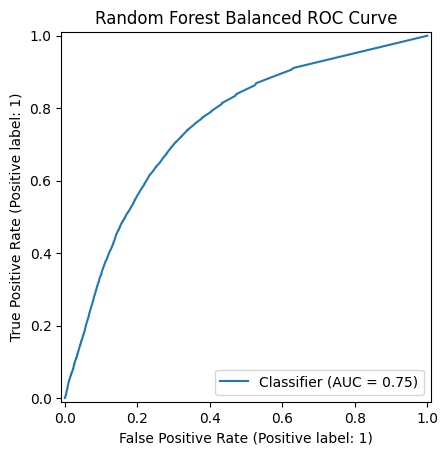

In [ ]:
RocCurveDisplay.from_predictions(y_test, y_proba_rf_bal)
plt.title("Random Forest Balanced ROC Curve")
plt.savefig("roc_rf_balanced.png")
plt.show()


In [ ]:
pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)

xgb_bal = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=pos_weight,
    random_state=42
)
xgb_bal.fit(X_train, y_train)

y_pred_xgb_bal = xgb_bal.predict(X_test)
y_proba_xgb_bal = xgb_bal.predict_proba(X_test)[:, 1]

print("XGB Bal Accuracy:", accuracy_score(y_test, y_pred_xgb_bal))
print("XGB Bal ROC-AUC:", roc_auc_score(y_test, y_proba_xgb_bal))
print(confusion_matrix(y_test, y_pred_xgb_bal))
print(classification_report(y_test, y_pred_xgb_bal))


XGB Bal Accuracy: 0.725324035710377
XGB Bal ROC-AUC: 0.8252444457353048
[[42096 16388]
 [ 1180  4295]]
              precision    recall  f1-score   support

           0       0.97      0.72      0.83     58484
           1       0.21      0.78      0.33      5475

    accuracy                           0.73     63959
   macro avg       0.59      0.75      0.58     63959
weighted avg       0.91      0.73      0.78     63959



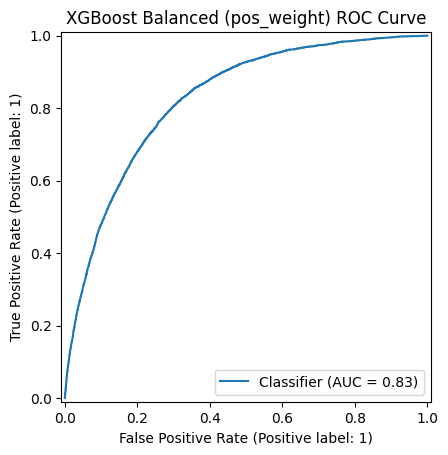

In [ ]:
RocCurveDisplay.from_predictions(y_test, y_proba_xgb_bal)
plt.title("XGBoost Balanced (pos_weight) ROC Curve")
plt.savefig("roc_xgb_balanced.png")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

results = []

def add_result(name, y_true, y_pred, y_proba):
    rep = classification_report(y_true, y_pred, output_dict=True)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "ROC_AUC": roc_auc_score(y_true, y_proba),
        "Recall_Pos": rep["1"]["recall"],
        "Precision_Pos": rep["1"]["precision"],
        "F1_Pos": rep["1"]["f1-score"],
    })


add_result("LogReg_base", y_test, y_pred,       y_proba)
add_result("RF_base",     y_test, y_pred_rf,    y_proba_rf)
add_result("XGB_base",    y_test, y_pred_xgb,   y_proba_xgb)


add_result("LogReg_bal",  y_test, y_pred_lr_bal,  y_proba_lr_bal)
add_result("RF_bal",      y_test, y_pred_rf_bal,  y_proba_rf_bal)
add_result("XGB_bal",     y_test, y_pred_xgb_bal, y_proba_xgb_bal)

results_df = pd.DataFrame(results)
display(results_df)


,Model,Accuracy,ROC_AUC,Recall_Pos,Precision_Pos,F1_Pos
0,LogReg_base,0.914304,0.824153,0.053699,0.494949,0.096886
1,RF_base,0.897278,0.754858,0.126393,0.279145,0.174001
2,XGB_base,0.914539,0.825161,0.031598,0.513353,0.059532
3,LogReg_bal,0.727826,0.824538,0.776986,0.208111,0.328291
4,RF_bal,0.889367,0.752063,0.141553,0.245954,0.179689
5,XGB_bal,0.725324,0.825244,0.784475,0.207658,0.328389


/tmp/ipython-input-929888205.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sleep_risk = eda_df.groupby("SleepCat")["HeartDisease"].mean()


SleepCat
<5     0.123740
5-7    0.071453
7-9    0.088470
9+     0.159615
Name: HeartDisease, dtype: float64


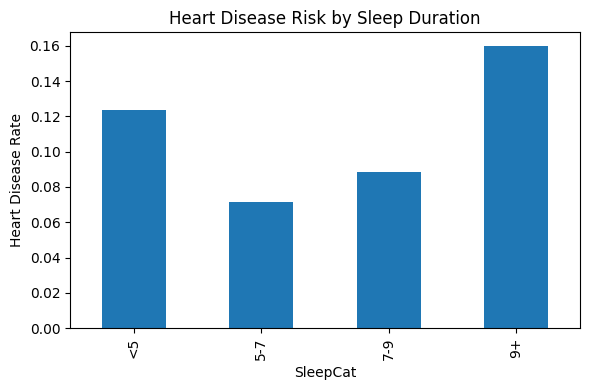

In [ ]:
eda_df = data_clean.copy()

eda_df["SleepCat"] = pd.cut(
    eda_df["SleepTime"],
    bins=[0, 5, 7, 9, 24],
    labels=["<5", "5-7", "7-9", "9+"]
)

sleep_risk = eda_df.groupby("SleepCat")["HeartDisease"].mean()
print(sleep_risk)

plt.figure(figsize=(6,4))
sleep_risk.plot(kind="bar")
plt.ylabel("Heart Disease Rate")
plt.title("Heart Disease Risk by Sleep Duration")
plt.tight_layout()
plt.show()


MentalCat
0 gün    0.088680
1-7      0.062832
8-14     0.075635
15-30    0.111265
Name: HeartDisease, dtype: float64


/tmp/ipython-input-1814123251.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ment_risk = eda_df.groupby("MentalCat")["HeartDisease"].mean()


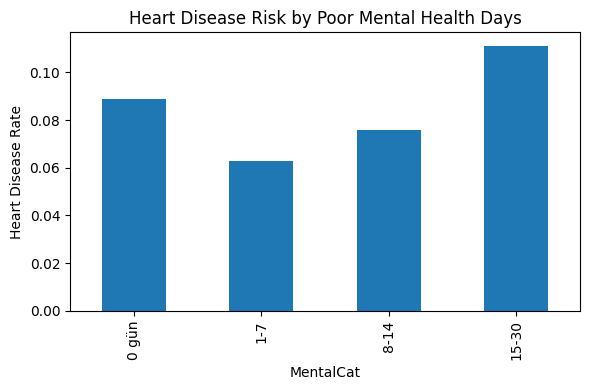

In [ ]:
eda_df["MentalCat"] = pd.cut(
    eda_df["MentalHealth"],
    bins=[-1, 0, 7, 14, 30],
    labels=["0 gün", "1-7", "8-14", "15-30"]
)

ment_risk = eda_df.groupby("MentalCat")["HeartDisease"].mean()
print(ment_risk)

plt.figure(figsize=(6,4))
ment_risk.plot(kind="bar")
plt.ylabel("Heart Disease Rate")
plt.title("Heart Disease Risk by Poor Mental Health Days")
plt.tight_layout()
plt.show()


Smoking
No     0.060334
Yes    0.121577
Name: HeartDisease, dtype: float64


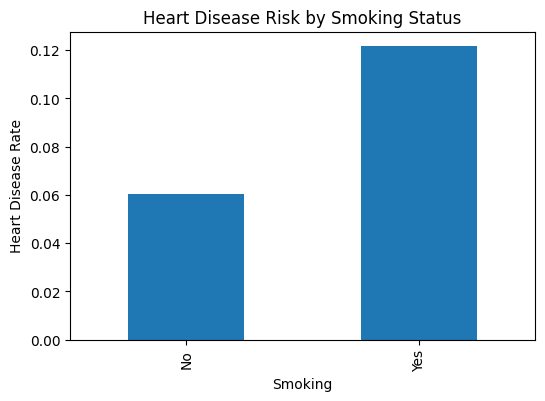

In [ ]:
smoking_risk = eda_df.groupby("Smoking")["HeartDisease"].mean()
print(smoking_risk)

smoking_risk.plot(kind="bar", figsize=(6,4))
plt.title("Heart Disease Risk by Smoking Status")
plt.ylabel("Heart Disease Rate")
plt.show()


AlcoholDrinking
No     0.088022
Yes    0.052395
Name: HeartDisease, dtype: float64


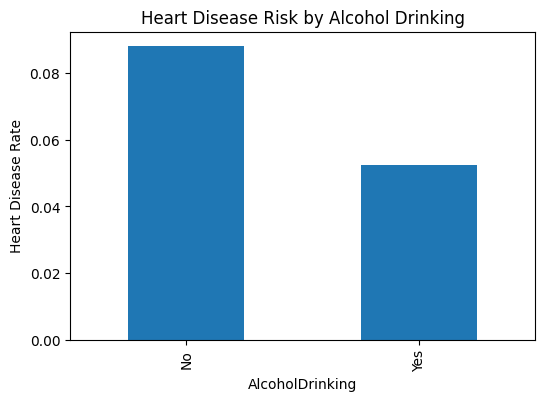

In [ ]:
alcohol_risk = eda_df.groupby("AlcoholDrinking")["HeartDisease"].mean()
print(alcohol_risk)

alcohol_risk.plot(kind="bar", figsize=(6,4))
plt.title("Heart Disease Risk by Alcohol Drinking")
plt.ylabel("Heart Disease Rate")
plt.show()


PhysicalActivity
No     0.137587
Yes    0.070532
Name: HeartDisease, dtype: float64


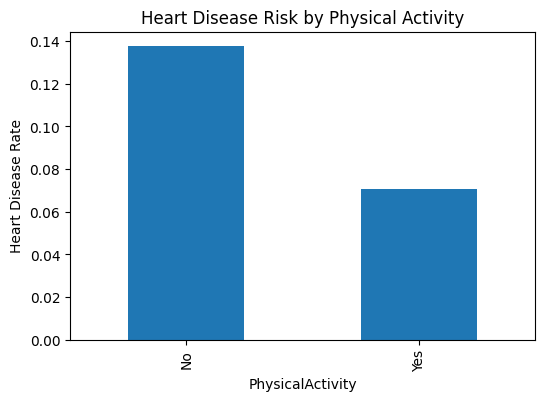

In [ ]:
phys_risk = eda_df.groupby("PhysicalActivity")["HeartDisease"].mean()
print(phys_risk)

phys_risk.plot(kind="bar", figsize=(6,4))
plt.title("Heart Disease Risk by Physical Activity")
plt.ylabel("Heart Disease Rate")
plt.show()


BMIcat
Underweight    0.078412
Normal         0.064831
Overweight     0.087403
Obese          0.103678
Name: HeartDisease, dtype: float64


/tmp/ipython-input-4104638659.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_risk = eda_df.groupby("BMIcat")["HeartDisease"].mean()


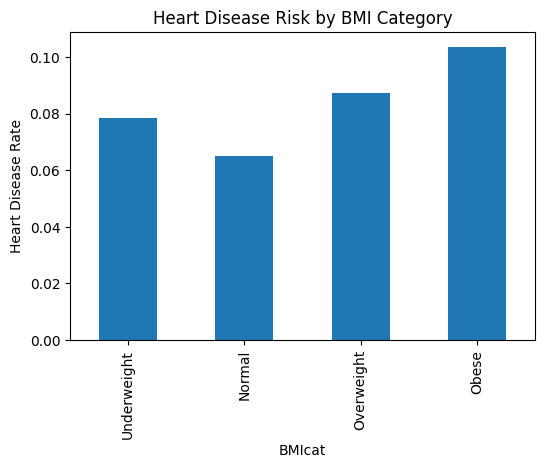

In [ ]:
eda_df["BMIcat"] = pd.cut(eda_df["BMI"], bins=[0,18.5,25,30,60],
                          labels=["Underweight","Normal","Overweight","Obese"])

bmi_risk = eda_df.groupby("BMIcat")["HeartDisease"].mean()
print(bmi_risk)

bmi_risk.plot(kind="bar", figsize=(6,4))
plt.title("Heart Disease Risk by BMI Category")
plt.ylabel("Heart Disease Rate")
plt.show()


AgeCategory
18-24          0.006172
25-29          0.007844
30-34          0.012051
35-39          0.014404
40-44          0.023136
45-49          0.034143
50-54          0.054487
55-59          0.073999
60-64          0.098765
65-69          0.120084
70-74          0.156028
75-79          0.188483
80 or older    0.225603
Name: HeartDisease, dtype: float64


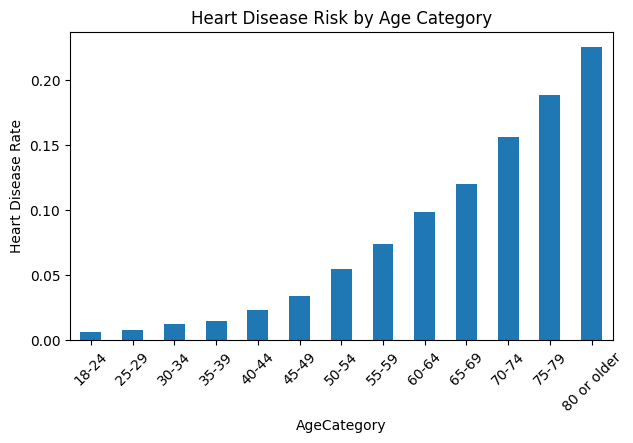

In [ ]:
age_risk = eda_df.groupby("AgeCategory")["HeartDisease"].mean()
print(age_risk)

age_risk.plot(kind="bar", figsize=(7,4))
plt.title("Heart Disease Risk by Age Category")
plt.ylabel("Heart Disease Rate")
plt.xticks(rotation=45)
plt.show()


In [ ]:
medical_history_features = [
    "Stroke",
    "DiffWalking",
    "Diabetic",
    "Asthma",
    "KidneyDisease",
    "SkinCancer"
]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import pandas as pd

def run_models_novelty_balanced(feature_list, df, target_col="HeartDisease"):

    data = df[feature_list + [target_col]].dropna()
    X = data[feature_list]
    y = data[target_col]

    #one-hot encoding
    cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
    X_enc = pd.get_dummies(X, columns=cat_cols, drop_first=True)


    X_train, X_test, y_train, y_test = train_test_split(
        X_enc, y, test_size=0.2, random_state=42, stratify=y)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    pos_weight = (len(y_train) - y_train.sum()) / y_train.sum()

    log_reg = LogisticRegression(
        max_iter=1000,
        class_weight="balanced"
    )
    log_reg.fit(X_train_scaled, y_train)
    y_pred_lr = log_reg.predict(X_test_scaled)
    y_proba_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

    xgb = XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=pos_weight,
        random_state=42
    )
    xgb.fit(X_train, y_train)
    y_pred_xgb = xgb.predict(X_test)
    y_proba_xgb = xgb.predict_proba(X_test)[:, 1]


    rep_lr = classification_report(y_test, y_pred_lr, output_dict=True)
    rep_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)

    results = pd.DataFrame({
        "Model": ["LogReg_bal", "XGB_bal"],
        "Accuracy": [
            accuracy_score(y_test, y_pred_lr),
            accuracy_score(y_test, y_pred_xgb)
        ],
        "ROC_AUC": [
            roc_auc_score(y_test, y_proba_lr),
            roc_auc_score(y_test, y_proba_xgb)
        ],
        "Recall_Pos": [
            rep_lr["1"]["recall"],
            rep_xgb["1"]["recall"]
        ],
        "Precision_Pos": [
            rep_lr["1"]["precision"],
            rep_xgb["1"]["precision"]
        ],
        "F1_Pos": [
            rep_lr["1"]["f1-score"],
            rep_xgb["1"]["f1-score"]
        ]
    })

    return results


In [ ]:
# Model A
base_features = sleep_features + stress_features + lifestyle_features + demographic_features
results_base_bal = run_models_novelty_balanced(base_features, df)
print("Model A (Lifestyle + Sleep + Stress + Demographic)")
display(results_base_bal)

# Model B
extended_features = base_features + medical_history_features
results_ext_bal = run_models_novelty_balanced(extended_features, df)
print("\nModel B (Model A + Medical History)")
display(results_ext_bal)


Model A (Lifestyle + Sleep + Stress + Demographic) - BALANCED


,Model,Accuracy,ROC_AUC,Recall_Pos,Precision_Pos,F1_Pos
0,LogReg_bal,0.727826,0.824538,0.776986,0.208111,0.328291
1,XGB_bal,0.725324,0.825244,0.784475,0.207658,0.328389



Model B (Model A + Medical History) - BALANCED


,Model,Accuracy,ROC_AUC,Recall_Pos,Precision_Pos,F1_Pos
0,LogReg_bal,0.748714,0.837166,0.774795,0.222315,0.345496
1,XGB_bal,0.746181,0.837127,0.781187,0.221457,0.345086
